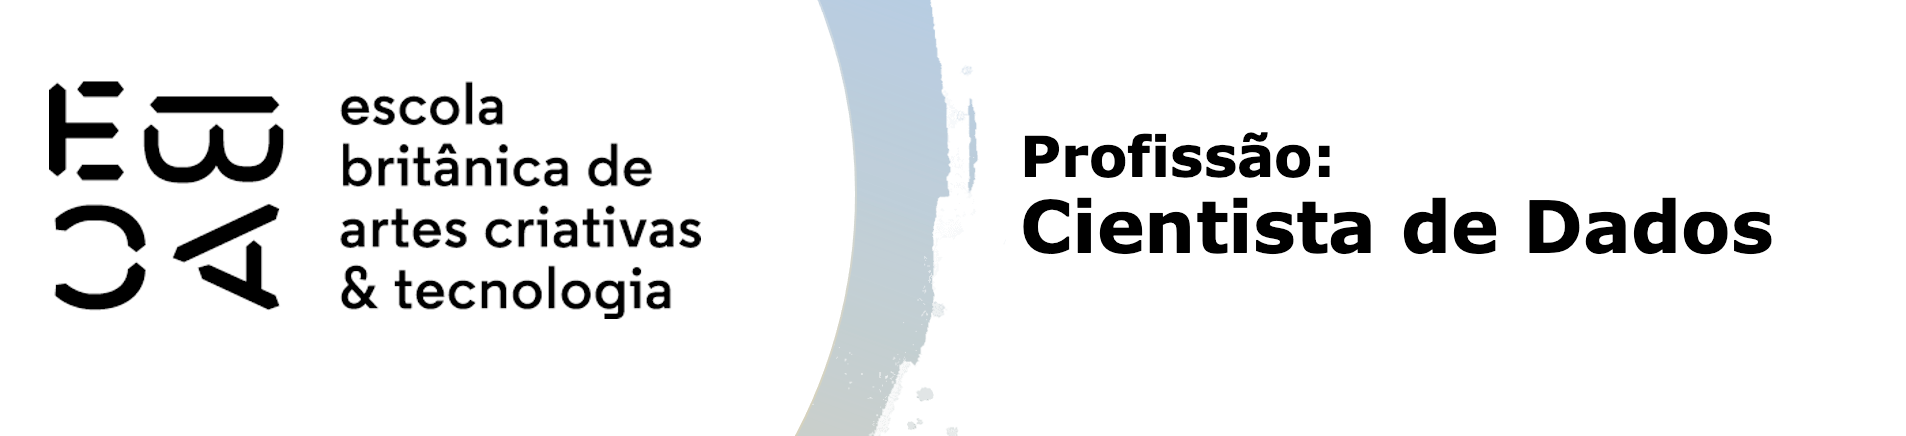

# Regressão III - Tarefa

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.interpolate import interp1d

In [66]:
df = pd.read_csv('./previsao_de_renda_II.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [5]:
df.isnull().sum()

index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64

In [68]:
# Aplicando a média para o valores NaN
df['tempo_emprego'] = df['tempo_emprego'].fillna(df['tempo_emprego'].mean())

df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [74]:
# Convertendo para date time
df.index = pd.to_datetime(df.index)

df['renda_log'] = np.log(df['renda'])

# Extraindo os últimos 3 meses
ultima_data = df.index.max()
tres_meses = ultima_data - pd.DateOffset(months=3)

# Separando em treino e teste
train = df[df.index <= tres_meses]
test = df[df.index > tres_meses]

print("Treino:", train.shape)
print("Teste:", test.shape)

Treino: (600000, 14)
Teste: (150000, 14)


### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

In [208]:
test.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,renda_log
data_ref,,,,,,,,,,,,,,
2016-01-01,12946,F,N,S,0,Pensionista,Médio,Casado,Casa,61,7.746165,2.0,2137.61,7.667444
2016-01-01,8872,F,N,S,2,Servidor público,Superior completo,Casado,Casa,27,9.301370,4.0,13884.35,9.538518
2016-01-01,16279,F,S,S,3,Assalariado,Médio,Casado,Casa,38,10.967123,5.0,11042.47,9.309504
2016-01-01,8158,M,S,S,3,Servidor público,Médio,Casado,Casa,35,5.553425,5.0,1333.82,7.195802
2016-01-01,9356,F,S,N,0,Assalariado,Médio,Viúvo,Casa,63,9.265753,1.0,17633.03,9.777529


In [210]:
modelo_1 = smf.ols('renda_log ~ tempo_emprego', data=test).fit()
modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              renda_log   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                 1.635e+05
Date:                Mon, 29 Sep 2025   Prob (F-statistic):               0.00
Time:                        16:30:12   Log-Likelihood:            -1.7066e+05
No. Observations:              150000   AIC:                         3.413e+05
Df Residuals:                  149998   BIC:                         3.413e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.0989      0.003   2252.228      0.000       7.093       7.105
tempo_emprego     0.1293      0.000    404.381      0.000       0.129       0.130
==============================================================================
Omnibus:                       13.139   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.567
Skew:                           0.008   Prob(JB):                      0.00113
Kurtosis:                       3.043   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [212]:
# Salvei o resultado do R quadrado para o primeiro modelo

primeiro_r2 = modelo_1.rsquared.round(6)
primeiro_r2

0.521572

### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

In [264]:
# Criando as categorias de tempo_emprego em 20 quantis
new_test = test.copy()
new_test['tempo_emprego_cat'] = pd.qcut(test['tempo_emprego'], 
                                        q=20, 
                                        duplicates='drop')

# A tabela de perfil
perfil = new_test.groupby('tempo_emprego_cat', observed=True).agg(
    observacoes=('tempo_emprego', 'size'),
    media_renda_log=('renda_log', 'mean'),
    media_tempo_emprego=('tempo_emprego', 'mean')
).reset_index()

perfil

,tempo_emprego_cat,observacoes,media_renda_log,media_tempo_emprego
0,"(0.11699999999999999, 0.827]",7601,7.202604,0.520903
1,"(0.827, 1.468]",7464,7.257080,1.134215
2,"(1.468, 2.099]",7459,7.401755,1.790156
3,"(2.099, 2.912]",7511,7.472002,2.514075
4,"(2.912, 3.636]",7507,7.578685,3.299975
5,"(3.636, 4.304]",7545,7.660521,3.994033
6,"(4.304, 4.945]",7420,7.734648,4.624617
7,"(4.945, 5.759]",7509,7.857738,5.370319
8,"(5.759, 6.622]",7492,7.969381,6.203618
9,"(6.622, 7.474]",7544,8.037298,7.020387


In [266]:
# Gráfico

def grafico (x,y):
    plt.figure(figsize=(8,5))
    plt.plot(perfil[x],
             perfil[y], marker='o')
    plt.xlabel('Média do tempo de emprego')
    plt.ylabel('Média do Log-Renda')
    plt.title('Perfil: Tempo de Emprego x Log-Renda')
    plt.show();

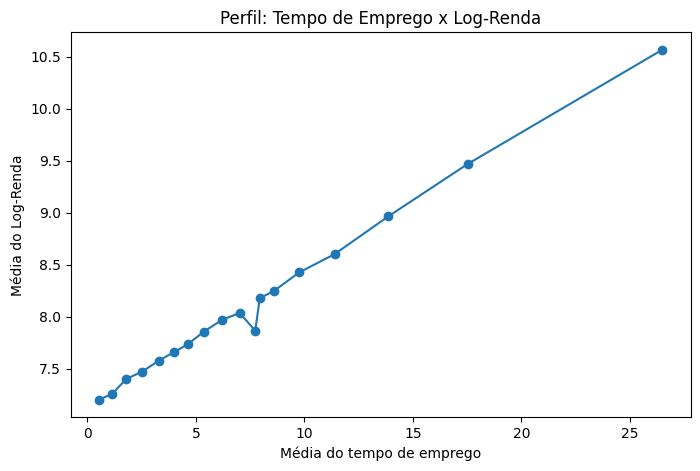

In [268]:
grafico('media_tempo_emprego', 'media_renda_log')

# Comentário sobre o gráfico

O gráfico evidencia uma relação crescente entre ```tempo de emprego``` e ```log-renda```, ou seja, conforme o **tempo** aumenta, **log-renda** também cresce de maneira aproximadamente monotônica, o que indica que modelos lineares podem capturar bem essa relação.


Pelo visto, a transformação da ```renda``` com log ajudou no resultado linear, por esta razão, testarei o mesmo método para ```tempo_emprego```.

O **Lowess** será usado como segunda alternativa, como uma ferramenta de exploração visual.

### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


### Log em *tempo_emprego*

In [273]:
perfil.head()

,tempo_emprego_cat,observacoes,media_renda_log,media_tempo_emprego
0,"(0.11699999999999999, 0.827]",7601,7.202604,0.520903
1,"(0.827, 1.468]",7464,7.257080,1.134215
2,"(1.468, 2.099]",7459,7.401755,1.790156
3,"(2.099, 2.912]",7511,7.472002,2.514075
4,"(2.912, 3.636]",7507,7.578685,3.299975


In [275]:
perfil['tempo_emprego_log'] = np.log(perfil['media_tempo_emprego'])

res_2 = smf.ols('media_renda_log ~ tempo_emprego_log', data=perfil).fit()
segundo_r2 = res_2.rsquared.round(6)
segundo_r2

0.723307

                            OLS Regression Results                            
Dep. Variable:        media_renda_log   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     41.83
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           7.77e-06
Time:                        17:02:47   Log-Likelihood:                -10.475
No. Observations:                  18   AIC:                             24.95
Df Residuals:                      16   BIC:                             26.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.9027      0.22

C:\Users\Meu Computador\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


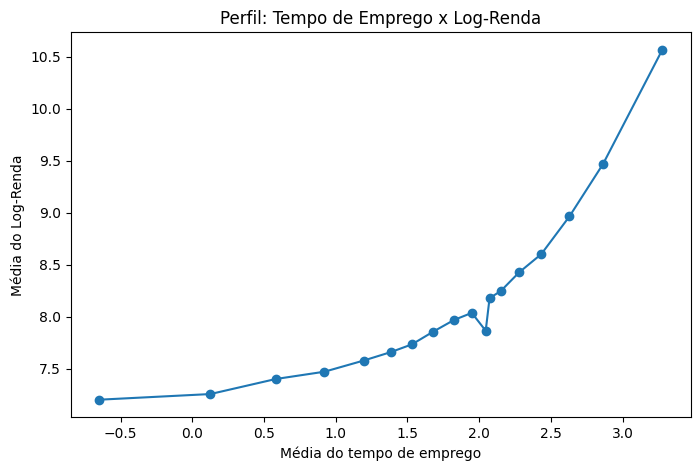

In [277]:
print(res_2.summary())
grafico('tempo_emprego_log', 'media_renda_log')

### Lowess

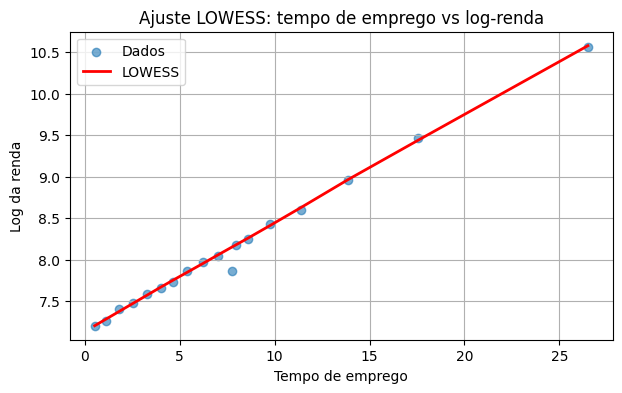

In [280]:
# Ajuste do LOWESS
lowess = sm.nonparametric.lowess
resultado_lowess = lowess(perfil['media_renda_log'], 
                          perfil['media_tempo_emprego'],
                          frac=2/3)

# Y suavizado
y_suave = resultado_lowess[:, 1]
x_suave = resultado_lowess[:, 0]


# Gráfico
plt.figure(figsize=(7,4))
plt.scatter(perfil['media_tempo_emprego'], perfil['media_renda_log'], alpha=0.6, label='Dados')
plt.plot(x_suave, y_suave, color='red', linewidth=2, label='LOWESS')
plt.xlabel("Tempo de emprego")
plt.ylabel("Log da renda")
plt.title("Ajuste LOWESS: tempo de emprego vs log-renda")
plt.legend()
plt.grid(True)
plt.show()

In [282]:
# Rodando a interpolação do scipy
f = interp1d(x_suave, y_suave, bounds_error=False)
perfil['X_lowess'] = f(perfil.media_tempo_emprego)
perfil.head()

,tempo_emprego_cat,observacoes,media_renda_log,media_tempo_emprego,tempo_emprego_log,X_lowess
0,"(0.11699999999999999, 0.827]",7601,7.202604,0.520903,-0.652192,7.202090
1,"(0.827, 1.468]",7464,7.257080,1.134215,0.125941,7.284110
2,"(1.468, 2.099]",7459,7.401755,1.790156,0.582303,7.371671
3,"(2.099, 2.912]",7511,7.472002,2.514075,0.921905,7.468313
4,"(2.912, 3.636]",7507,7.578685,3.299975,1.193915,7.573402


In [284]:
res_lowess = smf.ols('media_renda_log ~ X_lowess', data=perfil).fit()
res_lowess.summary()

C:\Users\Meu Computador\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        media_renda_log   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2391.
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           7.50e-19
Time:                        17:02:50   Log-Likelihood:                 23.084
No. Observations:                  18   AIC:                            -42.17
Df Residuals:                      16   BIC:                            -40.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0166      0.168     -0.099      0.922      -0.372       0.339
X_lowess       1.0002      0.020     48.900      0.000       0.957       1.044
==============================================================================
Omnibus:                       42.484   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.005
Skew:                          -3.471   Prob(JB):                     9.70e-29
Kurtosis:                      14.127   Cond. No.                         83.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [286]:
terceiro_r2 = res_lowess.rsquared

### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes

In [289]:
resultado = pd.DataFrame({
    'Sem_Transformacoes': primeiro_r2,
    'Transformacao_log': segundo_r2,
    'Lowess': terceiro_r2
}, index=['R²'])
resultado

,Sem_Transformacoes,Transformacao_log,Lowess
R²,0.521572,0.723307,0.993353


## Conclusões

Em relação ao $R^2-ajustado$, percebi que utilizando o método ```Lowess``` o ajuste ficou quase perfeito (0.993). Comparando-o com o *Sem_Transformacoes*, temos um aumento de praticamente **90%** no $R^2$ e, com o *Transformacao_log*, de **37,5%**.

É um aumento significativo. O gráfico abaixo corrobora com a ideia de que, neste caso, o modelo Lowess apresentou um melhor desempenho, ajustando-se melhor aos dados em toda a faixa e capturando a não linearidade que o outro modelo não conseguiu.

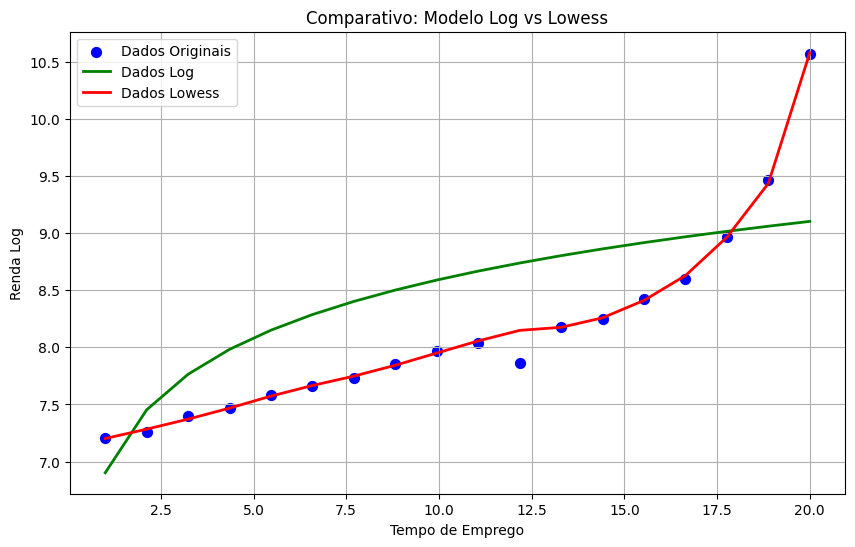

In [331]:
# Simulando 18 pontos de tempo de emprego
tempo_emprego = np.linspace(1, 20, 18)

# Modelo Log: usando coeficientes
intercepto_log = 6.9027
coef_log = 0.7343
pred_log = intercepto_log + coef_log * np.log(tempo_emprego)

renda = perfil['media_renda_log']

# Plotando
plt.figure(figsize=(10,6))
plt.scatter(tempo_emprego, renda, color='blue', label='Dados Originais', s=50)
plt.plot(tempo_emprego, pred_log, color='green', linewidth=2, label='Dados Log')
plt.plot(tempo_emprego, y_suave, color='red', linewidth=2, label='Dados Lowess')


plt.xlabel('Tempo de Emprego')
plt.ylabel('Renda Log')
plt.title('Comparativo: Modelo Log vs Lowess')
plt.legend()
plt.grid(True)
plt.show()